In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential

## Loading data

In [28]:
data = pd.read_csv("./creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploring data

In [29]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [30]:
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

## Defining model

In [38]:
class Autoencoder(Model):
	def __init__(self):
		super().__init__()
		
		self.encoder = Sequential([
			Dense(64, activation='relu'),
			Dropout(0.2),
			Dense(32, activation='relu'),
		])
		
		self.code = Sequential([
			Dense(16, activation='relu')
		])
		
		self.decoder = Sequential([
			Dense(32, activation='relu'),
			Dropout(0.2),
			Dense(64, activation='relu'),
			Dropout(0.2),
			Dense(29, activation='relu')
		])
		
	def call(self, inputs, *args):
		encoded_inputs = self.encoder(inputs)
		code = self.code(encoded_inputs)
		decoded_inputs = self.decoder(code)
		return decoded_inputs

## Training the model

In [40]:
model = Autoencoder()

model.compile(optimizer='adam', loss='mse')

In [41]:
history = model.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

Epoch 1/10
6231/6231 [==============================] - 13s 2ms/step - loss: 185.9773 - val_loss: 57.9633
Epoch 2/10
6231/6231 [==============================] - 14s 2ms/step - loss: 135.4563 - val_loss: 92.4637
Epoch 3/10
6231/6231 [==============================] - 15s 2ms/step - loss: 108.1964 - val_loss: 13.4005
Epoch 4/10
6231/6231 [==============================] - 17s 3ms/step - loss: 85.0210 - val_loss: 57.3752
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 108.6928 - val_loss: 123.8039
Epoch 6/10
6231/6231 [==============================] - 13s 2ms/step - loss: 137.9747 - val_loss: 348.5968
Epoch 7/10
6231/6231 [==============================] - 12s 2ms/step - loss: 95.6541 - val_loss: 89.4416
Epoch 8/10
6231/6231 [==============================] - 37s 6ms/step - loss: 125.0446 - val_loss: 116.9790
Epoch 9/10
6231/6231 [==============================] - 13s 2ms/step - loss: 127.1209 - val_loss: 44.4477
Epoch 10/10
6231/6231 [======================

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: 'accuracy'

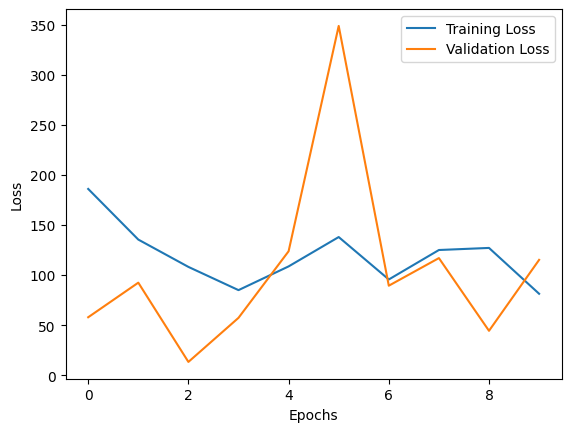

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Finding threshold for fraud transaction

In [44]:
def find_threshold(autoencoder_model: Model, train_data):
	# Reconstruct the input using the autoencoder model
	reconstruction = autoencoder_model.predict(train_data)
	
	# Calculate the loss
	loss = tf.keras.losses.msle(train_data, reconstruction)
	
	# Calculate the threshold
	threshold = np.mean(loss.numpy()) + np.std(loss.numpy())
	
	return threshold


def get_predictions(autoencoder_model: Model, test_data, threshold):
	# Reconstruct the input using the autoencoder model
	reconstruction = autoencoder_model.predict(test_data)
	
	# Calculate the loss
	loss = tf.keras.losses.msle(test_data, reconstruction)
	
	anomaly_mask = pd.Series(loss) > threshold
	
	preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
	
	return preds

In [45]:
threshold = find_threshold(model, X_train)
print(f'Threshold: {threshold}')

6231/6231 [==============================] - 5s 799us/step
Threshold: 0.23399455845355988


## Making predictions

In [46]:
y_preds = get_predictions(model, X_test, threshold)

print(accuracy_score(y_test, y_preds))

2671/2671 [==============================] - 2s 821us/step
0.10179886005875262


# Using SMOTE for handling class imbalance

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_test_sampled, y_test_sampled = smote.fit_resample(X_test, y_test)

In [21]:
model = Autoencoder()

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [22]:
history1 = model.fit(X_train_sampled, X_train_sampled, epochs=10, validation_data=(X_test_sampled, X_test_sampled))

Epoch 1/10
12438/12438 [==============================] - 16s 1ms/step - loss: 26.2095 - accuracy: 0.8671 - val_loss: 13.8113 - val_accuracy: 0.9110
Epoch 2/10
12438/12438 [==============================] - 15s 1ms/step - loss: 11.2592 - accuracy: 0.9307 - val_loss: 13.7872 - val_accuracy: 0.9202
Epoch 3/10
12438/12438 [==============================] - 15s 1ms/step - loss: 11.0653 - accuracy: 0.9305 - val_loss: 13.4958 - val_accuracy: 0.9264
Epoch 4/10
12438/12438 [==============================] - 15s 1ms/step - loss: 10.6492 - accuracy: 0.9425 - val_loss: 13.4008 - val_accuracy: 0.9454
Epoch 5/10
12438/12438 [==============================] - 18s 1ms/step - loss: 10.7330 - accuracy: 0.9460 - val_loss: 13.4401 - val_accuracy: 0.9428
Epoch 6/10
12438/12438 [==============================] - 16s 1ms/step - loss: 10.6636 - accuracy: 0.9473 - val_loss: 13.4262 - val_accuracy: 0.9378
Epoch 7/10
12438/12438 [==============================] - 15s 1ms/step - loss: 10.6734 - accuracy: 0.9495 

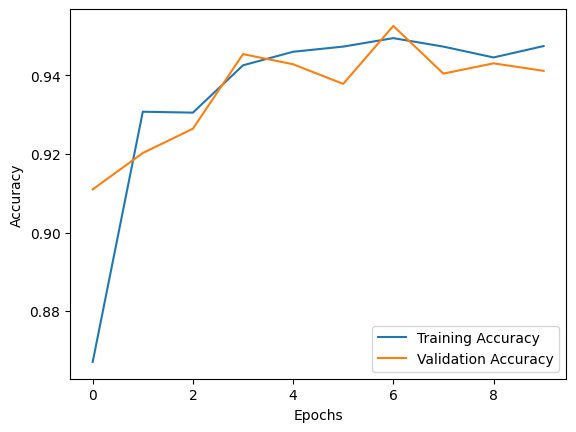

In [23]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

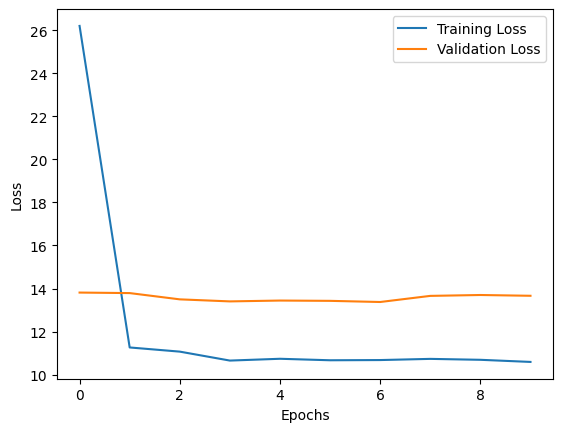

In [24]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
threshold = find_threshold(model, X_train_sampled)
print(f'Threshold: {threshold}')

12438/12438 [==============================] - 9s 696us/step
Threshold: 0.14403237402439117


In [26]:
y_preds = get_predictions(model, X_test, threshold)
print(accuracy_score(y_test, y_preds))

2671/2671 [==============================] - 2s 663us/step
0.14154465550132836
